# Data Cleaning

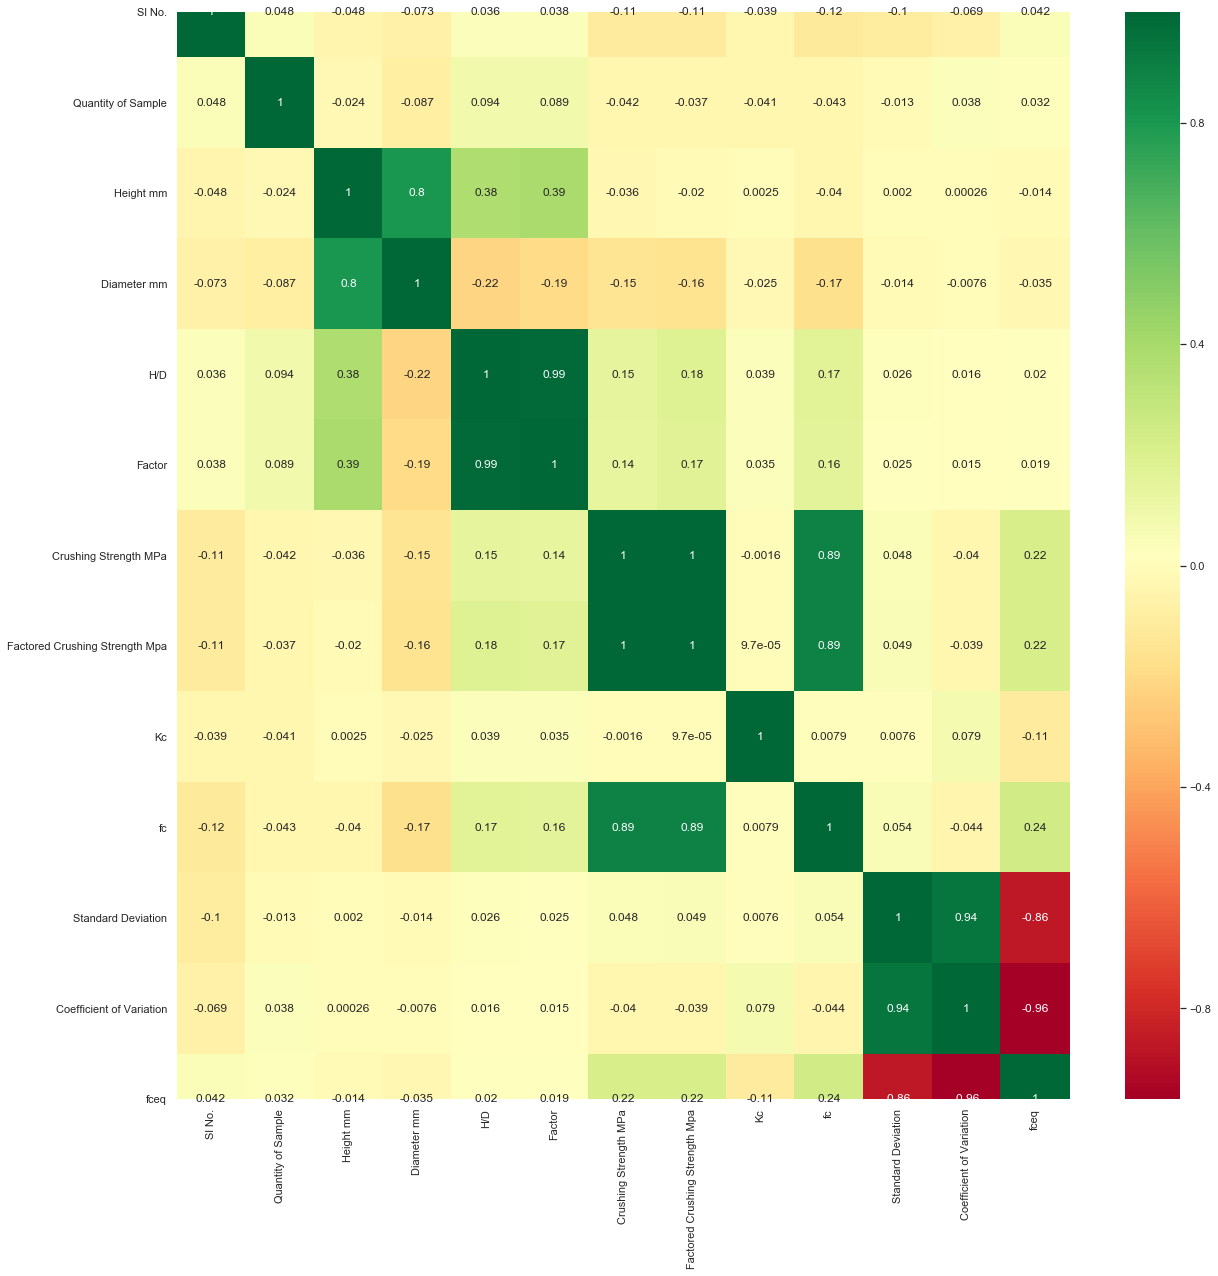

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
import math
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
df = pd.read_excel('FinalDataClean.xlsx')

df.head()

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

#Co-relation matrix visualisation to find out the columns with strong relations
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")



In [2]:
#Taking only the columns that are not strongly related to each other to avoid duplicacy and overfitting


df = df[["Sample Location", "Quantity of Sample", "Height mm","Diameter mm","Fracture Type","Crushing Strength psi"]]

df.head()

,Sample Location,Quantity of Sample,Height mm,Diameter mm,Fracture Type,Crushing Strength psi
0,B,3,135,69,Shear,4870
1,B,3,136,69,Shear,3000
2,B,3,137,69,Shear,3350
3,C,3,132,69,Columnar,4440
4,C,3,137,69,Columnar,3970


## String manipulation for Uniform Uniques Values on Categorical vairables

In [3]:
# Cleaning for Sample Location
dropList = []

for i, j in enumerate(df['Sample Location']):
    mixed = ( ('B' in j) and ('C' in j) ) or ( ('B' in j) and ('F' in j) ) or ( ('C' in j) and ('F' in j) ) or ( ('B' in j) and ('W' in j) )
    
    if(mixed):
        dropList.append(i)
    elif('B' in j):
        df.loc[i,'Sample Location'] = 'B'
    elif('F' in j):
        df.loc[i,'Sample Location'] = 'F'
    elif( ('Not available' in j) or ('Not Mentioned' in j) ):
        dropList.append(i)

df.drop(index = dropList, axis = 0, inplace = True)

#Cleaning for fracture type
dropListF = []

for i,j in enumerate(df["Fracture Type"]):
    
    if( ("Cone" in j) and ("Shear" in j) ):
        df.loc[i,'Fracture Type'] = "Cone and Shear"
    elif( ("Cone" in j) and ("Split" in j) ):
        df.loc[i,'Fracture Type'] = "Cone and Split"
    elif( ("Shear" in j) or ("SheaR" in j) ):
        df.loc[i,'Fracture Type'] = "Shear"
    elif("Cone" in j):
        df.loc[i,'Fracture Type'] = "Cone"
    elif( ("Columnar" in j) or ("Columner" in j) ):
        df.loc[i,'Fracture Type'] = "Columnar"
    elif( "Combined" in j):
        dropListF.append(i)

df.drop(index = dropListF, axis = 0, inplace = True)


# Preprocessing: Missing data Imputation and Outlier handling

In [4]:

df['Sample Location'].fillna(df['Sample Location'].value_counts().index[0], inplace=True)
df['Fracture Type'].fillna(df['Fracture Type'].value_counts().index[0], inplace=True)

df['Quantity of Sample'].fillna(df['Quantity of Sample'].mean(), inplace=True)
df['Height mm'].fillna(df['Height mm'].mean(), inplace=True)
df['Diameter mm'].fillna(df['Diameter mm'].mean(), inplace=True)
df['Crushing Strength psi'].fillna(df['Crushing Strength psi'].mean(), inplace=True)



print("List of Missing Value Sum:")
print(df.isnull().sum())

#Outliers detection and removal
min_threshold = df['Crushing Strength psi'].quantile(0.01)
outlier1 = df[df['Crushing Strength psi']<min_threshold]
max_threshold = df['Crushing Strength psi'].quantile(0.99)
outlier2 = df[df['Crushing Strength psi']>max_threshold]
df = df[(df['Crushing Strength psi']>min_threshold) & (df['Crushing Strength psi']<max_threshold)]


min_threshold = df['Quantity of Sample'].quantile(0.01)
outlier1 = df[df['Quantity of Sample']<min_threshold]
max_threshold = df['Quantity of Sample'].quantile(0.99)
outlier2 = df[df['Quantity of Sample']>max_threshold]
df = df[(df['Quantity of Sample']>min_threshold) & (df['Quantity of Sample']<max_threshold)]


min_threshold = df['Height mm'].quantile(0.01)
outlier1 = df[df['Height mm']<min_threshold]
max_threshold = df['Height mm'].quantile(0.99)
outlier2 = df[df['Height mm']>max_threshold]
df = df[(df['Height mm']>min_threshold) & (df['Height mm']<max_threshold)]



df = df.reset_index(drop=True)

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [6]:
df.head()

,Sample Location,Quantity of Sample,H/D,fc,Standard Deviation,Coefficient of Variation,Fracture Type,fceq
0,C,2.0,1.75,38.100,9.045310,0.237410,Columnar,16.524823
1,C,4.0,1.75,22.070,6.907352,0.312975,Shear,14.676023
2,C,2.0,1.75,28.322,7.484018,0.264248,Shear,10.804013
3,C,2.0,1.75,28.320,7.484018,0.264266,Shear,10.802220
4,C,2.0,1.75,29.390,5.949596,0.202436,Columnar,14.745805


## Splitting,encoding categorical data and feature scaling

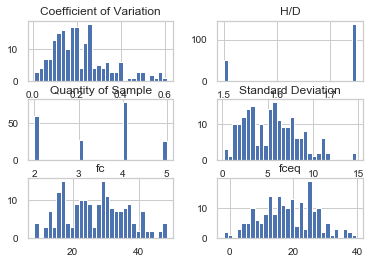

In [7]:
hist = df.hist(xlabelsize=10,ylabelsize=10,bins=30)

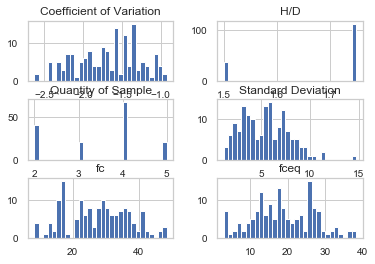

In [7]:
#The numerical variables except Coefficient of Variation are fairly normalised

df['Coefficient of Variation'] = np.log(df['Coefficient of Variation'])

min_threshold = df['Coefficient of Variation'].quantile(0.10)
outlier1 = df[df['Coefficient of Variation']<min_threshold]
max_threshold = df['Coefficient of Variation'].quantile(0.90)
outlier2 = df[df['Coefficient of Variation']>max_threshold]
df = df[(df['Coefficient of Variation']>min_threshold) & (df['Coefficient of Variation']<max_threshold)]


hist = df.hist(xlabelsize=10,ylabelsize=10,bins=30)


In [8]:
#Encoding Categorilcal Variables

features = pd.get_dummies(df["Fracture Type"])
features2 = pd.get_dummies(df["Sample Location"])

del df["Fracture Type"]
del df["Sample Location"]

df = pd.concat([df, features], axis=1)
df = pd.concat([df, features2], axis=1)


df.head()




,Quantity of Sample,H/D,fc,Standard Deviation,Coefficient of Variation,fceq,Columnar,Cone,Cone and Shear,Cone and Split,Shear,B,C,F,SS
0,2.0,1.75,38.100,9.045310,0.237410,16.524823,1,0,0,0,0,0,1,0,0
1,4.0,1.75,22.070,6.907352,0.312975,14.676023,0,0,0,0,1,0,1,0,0
2,2.0,1.75,28.322,7.484018,0.264248,10.804013,0,0,0,0,1,0,1,0,0
3,2.0,1.75,28.320,7.484018,0.264266,10.802220,0,0,0,0,1,0,1,0,0
4,2.0,1.75,29.390,5.949596,0.202436,14.745805,1,0,0,0,0,0,1,0,0


In [9]:
#Splitting to independent and dependant variables
X = df[['Quantity of Sample','H/D','fc','Standard Deviation','Coefficient of Variation','Columnar','Cone','Cone and Shear',
       'Cone and Split','Shear','B','C','F','SS']]
y = df['fceq']



from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Linear Regression

In [11]:
LinearR2 = cross_val_score(LinearRegression(),X,y,cv=10,scoring='r2').mean() * 100
LinearMAE = cross_val_score(LinearRegression(),X,y,cv=10,scoring='neg_mean_absolute_error').mean()
LinearMSE = cross_val_score(LinearRegression(),X,y,cv=10,scoring='neg_mean_squared_error').mean()
LinearRMSE = math.sqrt(LinearMSE*-1)

print("Average Test Prediction Scores after 10-fold Cross Validation For Linear Regression:\n")
print("R2 = ","{:.2f}".format(LinearR2),"%")
print("Mean Absolute Error = ",LinearMAE)
print("Mean Squared Error = ",LinearMSE)
print("Root Mean Squared Error = ",LinearRMSE,'\n')

Average Test Prediction Scores after 10-fold Cross Validation For Linear Regression:

R2 =  93.15 %
Mean Absolute Error =  -1.5369755707276516
Mean Squared Error =  -3.762778264593743
Root Mean Squared Error =  1.9397882009626057 



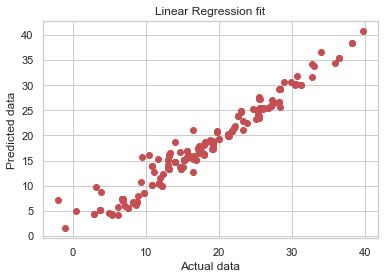

In [12]:
from sklearn.preprocessing import MinMaxScaler
sc_X = MinMaxScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

reg = linear_model.LinearRegression(normalize=True) 
  
# train the model using the training sets 
reg.fit(X_train, y_train) 

pred = reg.predict(X_test)

X_standardized = sc_X.transform(X)
MLR_y_pred_entire_data = reg.predict(X_standardized)
import matplotlib.pyplot as plt
plt.plot(y, MLR_y_pred_entire_data,  'ro')
plt.ylabel('Predicted data')
plt.title('Linear Regression fit')
plt.xlabel('Actual data')
plt.show()

In [13]:
correlated_features = set()
correlation_matrix = X.corr()


for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i,j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
            
correlated_features

set()

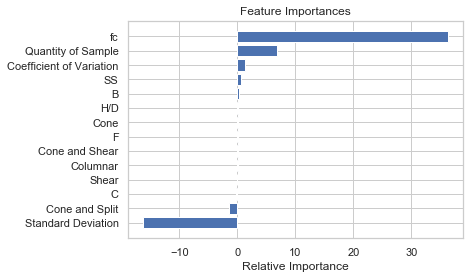

[ 6.86286531e+00  1.04514649e-01  3.62612834e+01 -1.62272582e+01
  1.24334976e+00  4.50144585e-02  9.34294120e-02  5.69051865e-02
 -1.46278918e+00  1.23277248e-02  2.30171497e-01 -2.87380856e-01
  6.82895897e-02  6.46711878e-01]
Intercept: 3.5687565598328064
Coefficients: [ 6.86286531e+00  1.04514649e-01  3.62612834e+01 -1.62272582e+01
  1.24334976e+00  4.50144585e-02  9.34294120e-02  5.69051865e-02
 -1.46278918e+00  1.23277248e-02  2.30171497e-01 -2.87380856e-01
  6.82895897e-02  6.46711878e-01]


In [14]:
#Set is empty so No Attributes in Dataset are strongly co-related

features = list(X.columns.values)
importances = reg.coef_

indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

print(importances)

#equation for Linear Regression
print('Intercept: {}'.format(reg.intercept_))
print('Coefficients: {}'.format(reg.coef_))

# Ridge Regression

In [15]:
RidgeR2 = cross_val_score(Ridge(alpha = 0.5, normalize = False, tol = 0.001,solver ='auto', random_state = 42),X,y,cv=10,scoring='r2').mean() * 100
RidgeMAE = cross_val_score(Ridge(alpha = 0.5, normalize = False, tol = 0.001,solver ='auto', random_state = 42),X,y,cv=10,scoring='neg_mean_absolute_error').mean()
RidgeMSE = cross_val_score(Ridge(alpha = 0.5, normalize = False, tol = 0.001,solver ='auto', random_state = 42),X,y,cv=10,scoring='neg_mean_squared_error').mean()
RidgeRMSE = math.sqrt(LinearMSE*-1)

print("Average Test Prediction Scores after 10-fold Cross Validation For Ridge Regression:\n")
print("R2 = ","{:.2f}".format(RidgeR2),"%")
print("Mean Absolute Error = ",RidgeMAE)
print("Mean Squared Error = ",RidgeMSE)
print("Root Mean Squared Error = ",RidgeRMSE,'\n')

Average Test Prediction Scores after 10-fold Cross Validation For Ridge Regression:

R2 =  93.24 %
Mean Absolute Error =  -1.51501520357241
Mean Squared Error =  -3.7187937706845853
Root Mean Squared Error =  1.9397882009626057 



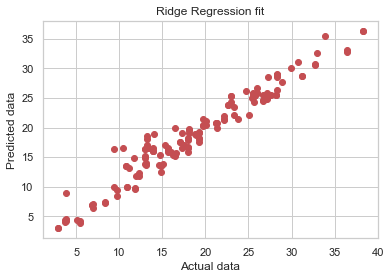

In [15]:
reg = linear_model.Ridge(alpha = 0.5, normalize = False, tol = 0.001,solver ='auto', random_state = 42) 
  
# train the model using the training sets 
reg.fit(X_train, y_train) 

pred = reg.predict(X_test)

X_standardized = sc_X.transform(X)
MLR_y_pred_entire_data = reg.predict(X_standardized)

plt.plot(y, MLR_y_pred_entire_data,  'ro')
plt.ylabel('Predicted data')
plt.title('Ridge Regression fit')
plt.xlabel('Actual data')
plt.show()

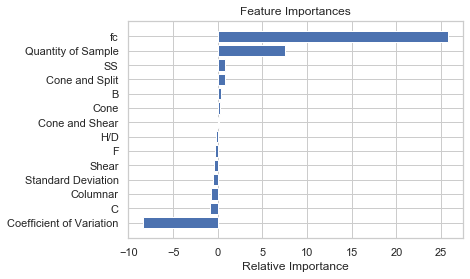

[ 7.55325549 -0.17382544 25.74876791 -0.50575925 -8.3407379  -0.74446335
  0.22991895  0.161841    0.76270698 -0.41000358  0.33127635 -0.90959616
 -0.25371562  0.83203542]
Intercept: 9.006941064242866
Coefficients: [ 7.55325549 -0.17382544 25.74876791 -0.50575925 -8.3407379  -0.74446335
  0.22991895  0.161841    0.76270698 -0.41000358  0.33127635 -0.90959616
 -0.25371562  0.83203542]


In [16]:
features = list(X.columns.values)
importances = reg.coef_

indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

print(importances)

#equation for Linear Regression
print('Intercept: {}'.format(reg.intercept_))
print('Coefficients: {}'.format(reg.coef_))

# Lasso Regression

In [17]:
LassoR2 = cross_val_score(Lasso(alpha=0.00001),X,y,cv=10,scoring='r2').mean() * 100
LassoMAE = cross_val_score(Lasso(alpha=0.00001),X,y,cv=10,scoring='neg_mean_absolute_error').mean()
LassoMSE = cross_val_score(Lasso(alpha=0.00001),X,y,cv=10,scoring='neg_mean_squared_error').mean()
LassoRMSE = math.sqrt(LinearMSE*-1)

print("Average Test Prediction Scores after 10-fold Cross Validation For Lasso Regression:\n")
print("R2 = ","{:.2f}".format(LassoR2),"%")
print("Mean Absolute Error = ",LassoMAE)
print("Mean Squared Error = ",LassoMSE)
print("Root Mean Squared Error = ",LassoRMSE,'\n')

Average Test Prediction Scores after 10-fold Cross Validation For Lasso Regression:

R2 =  92.65 %
Mean Absolute Error =  -1.3708961956150707
Mean Squared Error =  -3.2238796115497244
Root Mean Squared Error =  1.795537396311782 



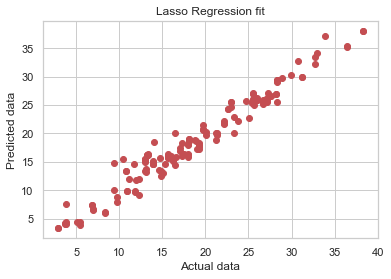

In [18]:
reg = linear_model.Lasso(alpha = 0.00001) 
  
# train the model using the training sets 
reg.fit(X_train, y_train) 

pred = reg.predict(X_test)

X_standardized = sc_X.transform(X)
MLR_y_pred_entire_data = reg.predict(X_standardized)
import matplotlib.pyplot as plt
plt.plot(y, MLR_y_pred_entire_data,  'ro')
plt.ylabel('Predicted data')
plt.title('Lasso Regression fit')
plt.xlabel('Actual data')
plt.show()

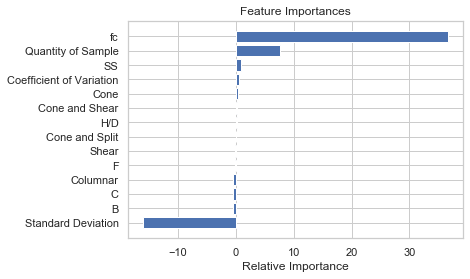

[  7.71437313   0.17391662  36.58372654 -15.91203774   0.54357111
  -0.43642646   0.37212332   0.30850814   0.          -0.13501439
  -0.49690582  -0.4668601   -0.14517309   0.95170519]
Intercept: 2.635074348057156
Coefficients: [  7.71437313   0.17391662  36.58372654 -15.91203774   0.54357111
  -0.43642646   0.37212332   0.30850814   0.          -0.13501439
  -0.49690582  -0.4668601   -0.14517309   0.95170519]


In [19]:
features = list(X.columns.values)
importances = reg.coef_

indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

print(importances)

#equation for Linear Regression
print('Intercept: {}'.format(reg.intercept_))
print('Coefficients: {}'.format(reg.coef_))

# K-Nearest Neighbours

In [16]:
KNR2 = cross_val_score(KNeighborsRegressor(n_neighbors=3),X,y,cv=10,scoring='r2').mean() * 100
KNMAE = cross_val_score(KNeighborsRegressor(n_neighbors=3),X,y,cv=10,scoring='neg_mean_absolute_error').mean()
KNMSE = cross_val_score(KNeighborsRegressor(n_neighbors=3),X,y,cv=10,scoring='neg_mean_squared_error').mean()
KNRMSE = math.sqrt(LinearMSE*-1)

print("Average Test Prediction Scores after 10-fold Cross Validation For K-Nearest Neighbour:\n")
print("R2 = ","{:.2f}".format(KNR2),"%")
print("Mean Absolute Error = ",KNMAE)
print("Mean Squared Error = ",KNMSE)
print("Root Mean Squared Error = ",KNRMSE,'\n')

Average Test Prediction Scores after 10-fold Cross Validation For K-Nearest Neighbour:

R2 =  85.90 %
Mean Absolute Error =  -1.849149289867373
Mean Squared Error =  -7.811246656405329
Root Mean Squared Error =  1.9397882009626057 



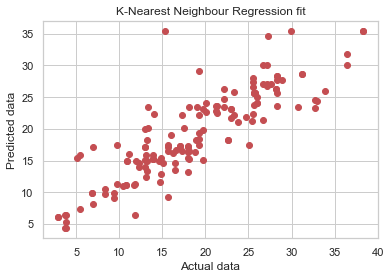

In [21]:
reg = KNeighborsRegressor(n_neighbors=3) 
  
# train the model using the training sets 
reg.fit(X_train, y_train) 

pred = reg.predict(X_test)

X_standardized = sc_X.transform(X)
MLR_y_pred_entire_data = reg.predict(X_standardized)
import matplotlib.pyplot as plt
plt.plot(y, MLR_y_pred_entire_data,  'ro')
plt.ylabel('Predicted data')
plt.title('K-Nearest Neighbour Regression fit')
plt.xlabel('Actual data')
plt.show()

# Decision Tree Regression

In [17]:
DesR2 = cross_val_score(DecisionTreeRegressor(max_depth=12,random_state = 0),X,y,cv=10,scoring='r2').mean() * 100
DesMAE = cross_val_score(DecisionTreeRegressor(max_depth=12,random_state = 0),X,y,cv=10,scoring='neg_mean_absolute_error').mean()
DesMSE = cross_val_score(DecisionTreeRegressor(max_depth=12,random_state = 0),X,y,cv=10,scoring='neg_mean_squared_error').mean()
DesRMSE = math.sqrt(LinearMSE*-1)

print("Average Test Prediction Scores after 10-fold Cross Validation For Decision Tree:\n")
print("R2 = ","{:.2f}".format(DesR2),"%")
print("Mean Absolute Error = ",DesMAE)
print("Mean Squared Error = ",DesMSE)
print("Root Mean Squared Error = ",DesRMSE,'\n')

Average Test Prediction Scores after 10-fold Cross Validation For Decision Tree:

R2 =  73.20 %
Mean Absolute Error =  -2.3888799717089264
Mean Squared Error =  -14.810840141905015
Root Mean Squared Error =  1.9397882009626057 



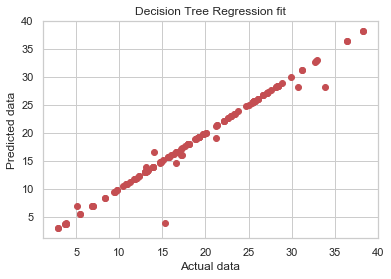

In [23]:
reg = DecisionTreeRegressor(max_depth=12,random_state = 0)
  
# train the model using the training sets 
reg.fit(X_train, y_train) 

pred = reg.predict(X_test)

X_standardized = sc_X.transform(X)
MLR_y_pred_entire_data = reg.predict(X_standardized)
import matplotlib.pyplot as plt
plt.plot(y, MLR_y_pred_entire_data,  'ro')
plt.ylabel('Predicted data')
plt.title('Decision Tree Regression fit')
plt.xlabel('Actual data')
plt.show()

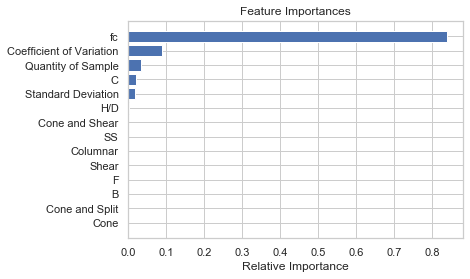

[3.34944324e-02 1.77751144e-03 8.38531146e-01 1.76136257e-02
 8.85871853e-02 6.95206616e-05 0.00000000e+00 1.50669276e-04
 0.00000000e+00 1.88295864e-06 0.00000000e+00 1.97028729e-02
 3.38821873e-08 7.11193584e-05]


In [24]:
features = list(X.columns.values)
importances = reg.feature_importances_
import numpy as np
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

print(importances)

# Random Forest Regression

In [25]:
RfR2 = cross_val_score(RandomForestRegressor(n_estimators = 1000, random_state = 0),X,y,cv=10,scoring='r2').mean() * 100
RfMAE = cross_val_score(RandomForestRegressor(n_estimators = 1000, random_state = 0),X,y,cv=10,scoring='neg_mean_absolute_error').mean()
RfMSE = cross_val_score(RandomForestRegressor(n_estimators = 1000, random_state = 0),X,y,cv=10,scoring='neg_mean_squared_error').mean()
RfRMSE = math.sqrt(LinearMSE*-1)

print("Average Test Prediction Scores after 10-fold Cross Validation For Random Forest Regression:\n")
print("R2 = ","{:.2f}".format(RfR2),"%")
print("Mean Absolute Error = ",RfMAE)
print("Mean Squared Error = ",RfMSE)
print("Root Mean Squared Error = ",RfRMSE,'\n')

Average Test Prediction Scores after 10-fold Cross Validation For Random Forest Regression:

R2 =  88.20 %
Mean Absolute Error =  -1.6498514522801795
Mean Squared Error =  -5.7840320202811455
Root Mean Squared Error =  1.795537396311782 



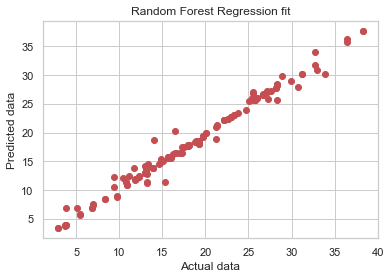

In [26]:
reg = RandomForestRegressor(n_estimators = 1000, random_state = 0)
  
# train the model using the training sets 
reg.fit(X_train, y_train) 

pred = reg.predict(X_test)

X_standardized = sc_X.transform(X)
MLR_y_pred_entire_data = reg.predict(X_standardized)
import matplotlib.pyplot as plt
plt.plot(y, MLR_y_pred_entire_data,  'ro')
plt.ylabel('Predicted data')
plt.title('Random Forest Regression fit')
plt.xlabel('Actual data')
plt.show()

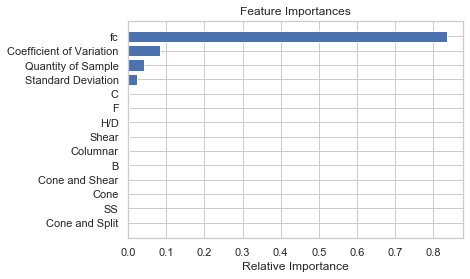

[4.22485665e-02 1.93822451e-03 8.35418873e-01 2.41609936e-02
 8.38193794e-02 1.45097580e-03 6.13862499e-04 7.86516088e-04
 5.73605997e-05 1.69877788e-03 1.16644172e-03 3.41558172e-03
 2.76174123e-03 4.62705605e-04]


In [27]:
features = list(X.columns.values)
importances = reg.feature_importances_

indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

print(importances)

# Support Vector Regression

In [18]:
SvR2 = cross_val_score(SVR(kernel='linear', C=21, degree=5),X,y,cv=10,scoring='r2').mean() * 100
SvMAE = cross_val_score(SVR(kernel='linear', C=21, degree=5),X,y,cv=10,scoring='neg_mean_absolute_error').mean()
SvMSE = cross_val_score(SVR(kernel='linear', C=21, degree=5),X,y,cv=10,scoring='neg_mean_squared_error').mean()
SvRMSE = math.sqrt(LinearMSE*-1)

print("Average Test Prediction Scores after 10-fold Cross Validation For SVR:\n")
print("R2 = ","{:.2f}".format(SvR2),"%")
print("Mean Absolute Error = ",SvMAE)
print("Mean Squared Error = ",SvMSE)
print("Root Mean Squared Error = ",SvRMSE,'\n')

Average Test Prediction Scores after 10-fold Cross Validation For SVR:

R2 =  91.55 %
Mean Absolute Error =  -1.3145489724733617
Mean Squared Error =  -5.1906112223231595
Root Mean Squared Error =  1.9397882009626057 



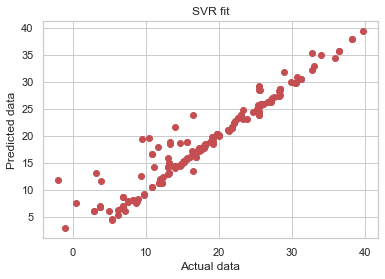

In [19]:
reg = SVR(kernel='linear', C=21)
  
# train the model using the training sets 
reg.fit(X_train, y_train) 

pred = reg.predict(X_test)

X_standardized = sc_X.transform(X)
MLR_y_pred_entire_data = reg.predict(X_standardized)
import matplotlib.pyplot as plt
plt.plot(y, MLR_y_pred_entire_data,  'ro')
plt.ylabel('Predicted data')
plt.title('SVR fit')
plt.xlabel('Actual data')
plt.show()

# XGBoost Regression

In [20]:
XGR2 = cross_val_score(xgb.XGBRegressor(),X,y,cv=10,scoring='r2').mean() * 100
XGMAE = cross_val_score(xgb.XGBRegressor(),X,y,cv=10,scoring='neg_mean_absolute_error').mean()
XGMSE = cross_val_score(xgb.XGBRegressor(),X,y,cv=10,scoring='neg_mean_squared_error').mean()
XGRMSE = math.sqrt(LinearMSE*-1)

print("Average Test Prediction Scores after 10-fold Cross Validation For XGBoost Regression:\n")
print("R2 = ","{:.2f}".format(XGR2),"%")
print("Mean Absolute Error = ",XGMAE)
print("Mean Squared Error = ",XGMSE)
print("Root Mean Squared Error = ",XGRMSE,'\n')

[19:32:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:32:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:32:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:32:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:32:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:32:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:32:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:32:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:32:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[18:11:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


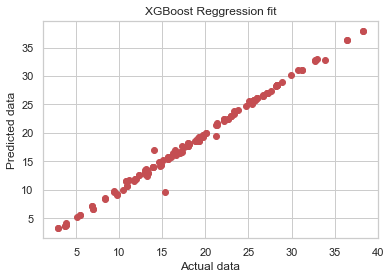

In [34]:
reg = xgb.XGBRegressor()
  
# train the model using the training sets 
reg.fit(X_train, y_train) 

pred = reg.predict(X_test)

X_standardized = sc_X.transform(X)
MLR_y_pred_entire_data = reg.predict(X_standardized)
import matplotlib.pyplot as plt
plt.plot(y, MLR_y_pred_entire_data,  'ro')
plt.ylabel('Predicted data')
plt.title('XGBoost Reggression fit')
plt.xlabel('Actual data')
plt.show()

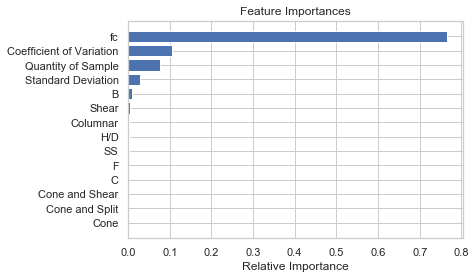

[7.7825218e-02 1.7649150e-03 7.6534909e-01 2.9682217e-02 1.0550688e-01
 2.6628240e-03 0.0000000e+00 3.8531856e-04 0.0000000e+00 5.0974796e-03
 8.6345766e-03 9.2147797e-04 1.0142673e-03 1.1557863e-03]


In [35]:
features = list(X.columns.values)
importances = reg.feature_importances_

indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

print(importances)

# Comparing all the models, XGBoost Reggression has the highest accuracy.